In [30]:
import sys
sys.path.insert(0, '/home/zhuoyan/vision/meta_dataset')
import time
import datasets
import os
import time
import json
import torch

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch.nn.functional as F
from collections import defaultdict

from distance_tools import load_test_features, simfunc, compute_mahalanobis_distance, MeanEmbeddingSimilarity,load_train_task_features

In [31]:
all = ['traffic_sign', 'mscoco', 'ilsvrc_2012', 'omniglot', 'aircraft', 'cu_birds', 'dtd', 'quickdraw', 'fungi', 'vgg_flower']
target = 'traffic_sign'
trsource = ['ilsvrc_2012', 'omniglot', 'aircraft', 'cu_birds', 'dtd', 'quickdraw', 'fungi', 'vgg_flower']

In [32]:
import json

with open(f'/datadrive2/datasets/meta_dataset_taskEmb/50_per_domain/{target}_sim_sorted_index.json', 'r') as file:
    sorted_index = json.load(file)

print(sorted_index)


[17, 16, 46, 40, 10, 27, 39, 18, 2, 45, 43, 30, 37, 6, 38, 22, 0, 28, 14, 8, 23, 25, 33, 31, 9, 48, 35, 4, 5, 36, 21, 15, 11, 20, 13, 34, 42, 49, 7, 41, 47, 29, 24, 1, 3, 32, 26, 44, 12, 19, 52, 94, 53, 50, 78, 76, 77, 71, 93, 69, 99, 68, 97, 98, 70, 75, 91, 82, 86, 60, 54, 83, 80, 63, 90, 88, 79, 59, 96, 95, 87, 67, 55, 81, 66, 65, 92, 58, 51, 57, 72, 84, 64, 89, 74, 62, 56, 73, 61, 85, 128, 101, 115, 121, 102, 116, 129, 119, 147, 143, 124, 131, 109, 125, 144, 123, 134, 126, 105, 118, 141, 142, 149, 130, 113, 146, 117, 107, 114, 106, 145, 139, 148, 122, 133, 140, 127, 112, 135, 108, 104, 120, 100, 136, 110, 111, 132, 137, 103, 138, 206, 221, 220, 249, 247, 216, 218, 208, 241, 205, 213, 217, 233, 214, 202, 239, 209, 243, 227, 311, 225, 228, 226, 215, 248, 237, 235, 201, 219, 203, 224, 230, 204, 223, 310, 231, 207, 229, 242, 240, 349, 336, 211, 234, 312, 329, 343, 305, 339, 232, 308, 212, 246, 314, 318, 345, 304, 320, 342, 222, 244, 330, 210, 236, 335, 348, 300, 302, 334, 319, 332, 325,

In [33]:
features = load_test_features(0)
features.keys()

Loading image features from cached file /datadrive2/datasets/meta_dataset_taskEmb/testSet/clip/subset0_8domains_features.json [took 1.434 s]


dict_keys(['traffic_sign', 'mscoco', 'ilsvrc_2012', 'omniglot', 'aircraft', 'cu_birds', 'dtd', 'quickdraw', 'fungi', 'vgg_flower'])

In [34]:
target_features = features['traffic_sign']
target_features.shape

torch.Size([2000, 512])

In [35]:
task_features = load_train_task_features(task_id = 16)
task_features.shape

torch.Size([150, 512])

In [36]:
torch.concat([task_features,task_features]).shape

torch.Size([300, 512])

In [37]:
torch.concat([task_features]).shape

torch.Size([150, 512])

In [38]:
compute_mahalanobis_distance(features[target], task_features).item()

1103636992.0

In [39]:
current_set = []
mh_distances = []
count = 1
for task_id in sorted_index:
    task_features = load_train_task_features(task_id)
    current_set.append(task_features)
    train_set_features = torch.concat(current_set)
    distance = compute_mahalanobis_distance(features[target], train_set_features).item()
    print(distance)
    mh_distances.append(distance)
    count += 1
    if count % 10 == 1:
        print(f"done {count}-th task")

-2022112512.0
402159104.0
-416596992.0
37118.96875
14110.98828125


KeyboardInterrupt: 

In [35]:
distances = [-i if i < 0 else i for i in mh_distances]

In [39]:
distances = 1/(np.array(distances))

In [40]:
distances.shape

(350,)

In [41]:
distances

array([4.94532324e-10, 2.48657805e-09, 2.40040139e-09, 2.69404036e-05,
       7.08667586e-05, 1.08135325e-04, 1.30487541e-04, 1.43815236e-04,
       1.61912388e-04, 1.70092265e-04, 1.77245150e-04, 1.82516098e-04,
       1.87856904e-04, 1.92019274e-04, 1.93139384e-04, 1.94332734e-04,
       1.98282302e-04, 2.02073583e-04, 2.02845462e-04, 2.05810240e-04,
       2.08867784e-04, 2.08788614e-04, 2.12192973e-04, 2.13882186e-04,
       2.15754799e-04, 2.15595968e-04, 2.15631198e-04, 2.17274212e-04,
       2.16999035e-04, 2.19018928e-04, 2.20319836e-04, 2.19173063e-04,
       2.19475422e-04, 2.20165765e-04, 2.20441279e-04, 2.21797111e-04,
       2.20456228e-04, 2.19034669e-04, 2.18906791e-04, 2.19120113e-04,
       2.18459439e-04, 2.19931838e-04, 2.19495957e-04, 2.19982346e-04,
       2.20389991e-04, 2.21596314e-04, 2.22157715e-04, 2.22739919e-04,
       2.22923260e-04, 2.22106686e-04, 2.26131705e-04, 2.29274554e-04,
       2.35581612e-04, 2.41043010e-04, 2.43223615e-04, 2.45098127e-04,
      

<Axes: >

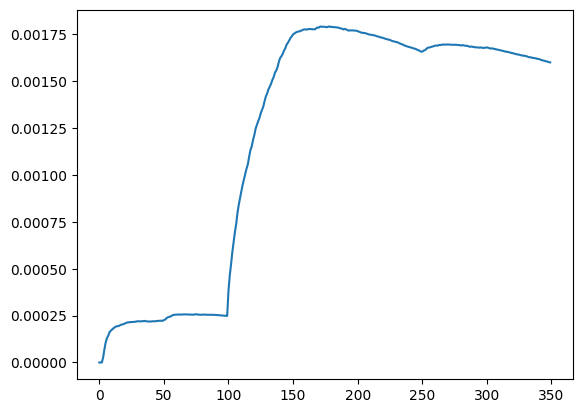

In [59]:
import seaborn as sns
sns.lineplot(distances)

<Axes: >

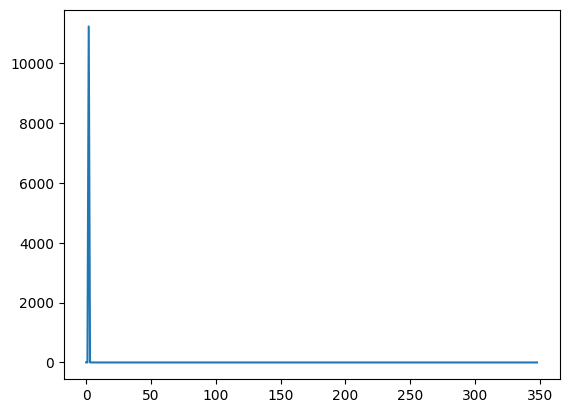

In [60]:
differences = [(distances[i] - distances[i - 1])/distances[i - 1] for i in range(1, len(distances))]
sns.lineplot(differences)

<Axes: >

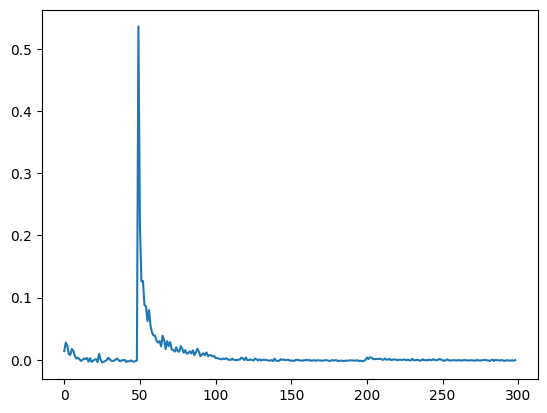

: 

In [76]:
sns.lineplot(differences[50:])

In [71]:
differences = np.array(differences)
np.where(differences >= 1e-3)

(array([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  23,  26,  28,  29,  31,
         32,  33,  34,  40,  42,  43,  44,  45,  46,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  63,  64,  65,  67,  73,
         79,  85,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
        123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
        136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
        149, 150, 151, 152, 153, 155, 156, 157, 161, 167, 168, 170, 176,
        189, 250, 251, 252, 253, 254, 256, 257, 258, 259, 262, 265, 280,
        298]),)

In [75]:
np.where(differences >= 1e-4)[0].shape

(158,)

In [19]:
def load_train_task_features(task_id = 0):
    with open(f'/datadrive2/datasets/meta_dataset_taskEmb/50_per_domain/clip/task_{task_id}.json', 'r') as json_file:
        task = json.load(json_file)

    fea = torch.tensor(task['features'])
    return fea
distance = compute_mahalanobis_distance(features[target], load_train_task_features(task_id = 0)).item()
distance

-410628416.0

In [21]:
def load_train_task_features(task_path = "/datadrive2/datasets/meta_dataset_taskEmb/100_per_domain/clip", task_id = 0):
    with open(f'{task_path}/task_{task_id}.json', 'r') as json_file:
        task = json.load(json_file)
    # source = task['source']
    fea = torch.tensor(task['features'])
    return fea

compute_mahalanobis_distance(features[target], load_train_task_features(task_path = "/datadrive2/datasets/meta_dataset_taskEmb/100_per_domain/clip", task_id = 0)).item()

-410628416.0

In [24]:
root = "/datadrive2/datasets/meta_dataset_taskEmb/100_per_domain"
current_set = []
mh_distances = []
count = 1
for task_id in sorted_index:
    task_features = load_train_task_features(os.path.join(root, "clip"), task_id)
    current_set.append(task_features)
    train_set_features = torch.concat(current_set)
    distance = compute_mahalanobis_distance(features[target], train_set_features).item()
    mh_distances.append(distance)
    print(distance)
    count += 1
    if count % 20 == 1:
        print(f"target: {target} | {0}-th test features | done {count}-th task")

-2022112512.0
402159104.0
-416596992.0
37118.96875
14110.98828125
9247.671875
7663.56689453125
6953.3662109375
6176.1796875
5879.162109375
5641.9033203125


KeyboardInterrupt: 

#### load div

In [25]:
div_by_tasks_cached_file = "/datadrive2/datasets/meta_dataset_taskEmb/100_per_domain/traffic_sign_div_by_tasks.npy"

In [26]:
final = np.load(div_by_tasks_cached_file)

In [27]:
final.shape

(10, 700)

In [28]:
final[0]

array([-1.10152131e+10, -5.22546784e+08,  9.69288576e+08,  4.02193984e+04,
        1.48599541e+04,  1.00892715e+04,  8.00936523e+03,  6.66403711e+03,
        6.53031543e+03,  6.19112695e+03,  5.72926855e+03,  5.61245557e+03,
        5.37272363e+03,  5.20125195e+03,  4.93235889e+03,  4.86339551e+03,
        4.76691309e+03,  4.73222119e+03,  4.53279688e+03,  4.45627637e+03,
        4.39868555e+03,  4.37764941e+03,  4.38899561e+03,  4.39787939e+03,
        4.34915430e+03,  4.35012402e+03,  4.31670508e+03,  4.32189746e+03,
        4.31638184e+03,  4.29622656e+03,  4.27290332e+03,  4.27610059e+03,
        4.24800537e+03,  4.26652148e+03,  4.23552051e+03,  4.24709180e+03,
        4.23252295e+03,  4.23274268e+03,  4.21201758e+03,  4.18951709e+03,
        4.17857422e+03,  4.19759766e+03,  4.20384473e+03,  4.20547070e+03,
        4.20363184e+03,  4.18848682e+03,  4.18085449e+03,  4.18327832e+03,
        4.17796729e+03,  4.16481152e+03,  4.15872314e+03,  4.17005176e+03,
        4.16199121e+03,  

In [45]:
distances2 = np.array([-i if i < 0 else i for i in final[0]])
distances2 = 1/distances2

<Axes: >

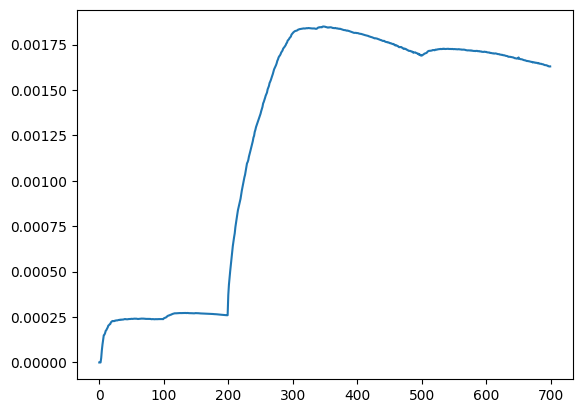

In [46]:
import seaborn as sns
sns.lineplot(distances2)

In [49]:
1/distances

array([2.02211251e+09, 4.02159104e+08, 4.16596992e+08, 3.71189688e+04,
       1.41109883e+04, 9.24767188e+03, 7.66356689e+03, 6.95336621e+03,
       6.17617969e+03, 5.87916211e+03, 5.64190332e+03, 5.47896875e+03,
       5.32320068e+03, 5.20781055e+03, 5.17760791e+03, 5.14581348e+03,
       5.04331445e+03, 4.94869238e+03, 4.92986133e+03, 4.85884473e+03,
       4.78771777e+03, 4.78953320e+03, 4.71269141e+03, 4.67547119e+03,
       4.63489111e+03, 4.63830566e+03, 4.63754785e+03, 4.60247900e+03,
       4.60831543e+03, 4.56581543e+03, 4.53885596e+03, 4.56260449e+03,
       4.55631885e+03, 4.54203223e+03, 4.53635547e+03, 4.50862500e+03,
       4.53604785e+03, 4.56548730e+03, 4.56815430e+03, 4.56370703e+03,
       4.57750879e+03, 4.54686328e+03, 4.55589258e+03, 4.54581934e+03,
       4.53741113e+03, 4.51271045e+03, 4.50130664e+03, 4.48954102e+03,
       4.48584863e+03, 4.50234082e+03, 4.42220166e+03, 4.36158301e+03,
       4.24481348e+03, 4.14863721e+03, 4.11144287e+03, 4.07999854e+03,
      

In [50]:
1/distances2

array([1.10152131e+10, 5.22546784e+08, 9.69288576e+08, 4.02193984e+04,
       1.48599541e+04, 1.00892715e+04, 8.00936523e+03, 6.66403711e+03,
       6.53031543e+03, 6.19112695e+03, 5.72926855e+03, 5.61245557e+03,
       5.37272363e+03, 5.20125195e+03, 4.93235889e+03, 4.86339551e+03,
       4.76691309e+03, 4.73222119e+03, 4.53279688e+03, 4.45627637e+03,
       4.39868555e+03, 4.37764941e+03, 4.38899561e+03, 4.39787939e+03,
       4.34915430e+03, 4.35012402e+03, 4.31670508e+03, 4.32189746e+03,
       4.31638184e+03, 4.29622656e+03, 4.27290332e+03, 4.27610059e+03,
       4.24800537e+03, 4.26652148e+03, 4.23552051e+03, 4.24709180e+03,
       4.23252295e+03, 4.23274268e+03, 4.21201758e+03, 4.18951709e+03,
       4.17857422e+03, 4.19759766e+03, 4.20384473e+03, 4.20547070e+03,
       4.20363184e+03, 4.18848682e+03, 4.18085449e+03, 4.18327832e+03,
       4.17796729e+03, 4.16481152e+03, 4.15872314e+03, 4.17005176e+03,
       4.16199121e+03, 4.15647852e+03, 4.13838574e+03, 4.14421924e+03,
      